In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('network_logs.xlsx')

In [3]:
df.head()

,networkId,type,description,deviceSerial,occurredAt
0,N_667095694804410110,carrier_event,Ethernet port carrier change,Q2PN-AH88-6CK7,2022-10-13T08:48:04.993607Z
1,N_667095694804410110,carrier_event,Ethernet port carrier change,Q2PN-AH88-6CK7,2022-10-13T08:48:04.993370Z
2,N_667095694804410110,carrier_event,Ethernet port carrier change,Q2PN-AH88-6CK7,2022-09-15T19:48:26.420429Z
3,N_667095694804410110,carrier_event,Ethernet port carrier change,Q2PN-AH88-6CK7,2022-09-15T19:48:26.419953Z
4,N_667095694804410110,carrier_event,Ethernet port carrier change,Q2PN-AH88-6CK7,2022-09-24T14:49:47.433252Z


In [6]:
features = ['networkId','type','occurredAt']
X = df[features]

In [7]:
X

,networkId,type,occurredAt
0,N_667095694804410110,carrier_event,2022-10-13T08:48:04.993607Z
1,N_667095694804410110,carrier_event,2022-10-13T08:48:04.993370Z
2,N_667095694804410110,carrier_event,2022-09-15T19:48:26.420429Z
3,N_667095694804410110,carrier_event,2022-09-15T19:48:26.419953Z
4,N_667095694804410110,carrier_event,2022-09-24T14:49:47.433252Z
...,...,...,...
756,N_667095694804410110,client_connectivity,2022-11-16T10:57:49.927942Z
757,N_667095694804410110,client_connectivity,2022-11-16T16:28:00.556771Z
758,N_667095694804410110,client_connectivity,2022-11-17T06:22:14.598882Z
759,N_667095694804410110,client_connectivity,2022-11-17T06:21:32.202351Z


In [10]:
X.dtypes

networkId     object
type          object
occurredAt    object
dtype: object

In [15]:
X['occurredAt'] = pd.to_datetime(X['occurredAt'])
X

C:\Users\Saiteja.Gummala\AppData\Local\Temp\ipykernel_3904\635665140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occurredAt'] = pd.to_datetime(X['occurredAt'])


,networkId,type,occurredAt
0,N_667095694804410110,carrier_event,2022-10-13 08:48:04.993607+00:00
1,N_667095694804410110,carrier_event,2022-10-13 08:48:04.993370+00:00
2,N_667095694804410110,carrier_event,2022-09-15 19:48:26.420429+00:00
3,N_667095694804410110,carrier_event,2022-09-15 19:48:26.419953+00:00
4,N_667095694804410110,carrier_event,2022-09-24 14:49:47.433252+00:00
...,...,...,...
756,N_667095694804410110,client_connectivity,2022-11-16 10:57:49.927942+00:00
757,N_667095694804410110,client_connectivity,2022-11-16 16:28:00.556771+00:00
758,N_667095694804410110,client_connectivity,2022-11-17 06:22:14.598882+00:00
759,N_667095694804410110,client_connectivity,2022-11-17 06:21:32.202351+00:00


In [19]:
X['occurredAt'] = X['occurredAt'].dt.strftime('%Y-%m-%d %H:%M:%S')

AttributeError: Can only use .dt accessor with datetimelike values

In [22]:
X

,networkId,type,occurredAt
0,N_667095694804410110,carrier_event,2022-10-13 08:48:04
1,N_667095694804410110,carrier_event,2022-10-13 08:48:04
2,N_667095694804410110,carrier_event,2022-09-15 19:48:26
3,N_667095694804410110,carrier_event,2022-09-15 19:48:26
4,N_667095694804410110,carrier_event,2022-09-24 14:49:47
...,...,...,...
756,N_667095694804410110,client_connectivity,2022-11-16 10:57:49
757,N_667095694804410110,client_connectivity,2022-11-16 16:28:00
758,N_667095694804410110,client_connectivity,2022-11-17 06:22:14
759,N_667095694804410110,client_connectivity,2022-11-17 06:21:32


In [23]:
X.dtypes

networkId     object
type          object
occurredAt    object
dtype: object

In [24]:
X['occurredAt'] = pd.to_datetime(X['occurredAt'])

C:\Users\Saiteja.Gummala\AppData\Local\Temp\ipykernel_3904\127594431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occurredAt'] = pd.to_datetime(X['occurredAt'])


In [25]:
X['occurred_date'] = X['occurredAt'].dt.date
X['occured_time'] = X['occurredAt'].dt.time

C:\Users\Saiteja.Gummala\AppData\Local\Temp\ipykernel_3904\2760340290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occurred_date'] = X['occurredAt'].dt.date


In [33]:
X.to_csv('network_cleaned.csv')

In [29]:
X.set_index('occurredAt', inplace=True)

In [30]:
grouped = X.groupby(['networkId', 'type'])['type'].resample('D').count()

In [36]:
grouped

networkId             type                 occurredAt
N_667095694804410110  carrier_event        2022-09-15     2
                                           2022-09-16     0
                                           2022-09-17     0
                                           2022-09-18     0
                                           2022-09-19     0
                                                         ..
                      client_connectivity  2022-11-13     0
                                           2022-11-14    39
                                           2022-11-15    14
                                           2022-11-16     8
                                           2022-11-17     3
Name: type, Length: 139, dtype: int64

In [31]:
import matplotlib.pyplot as plt

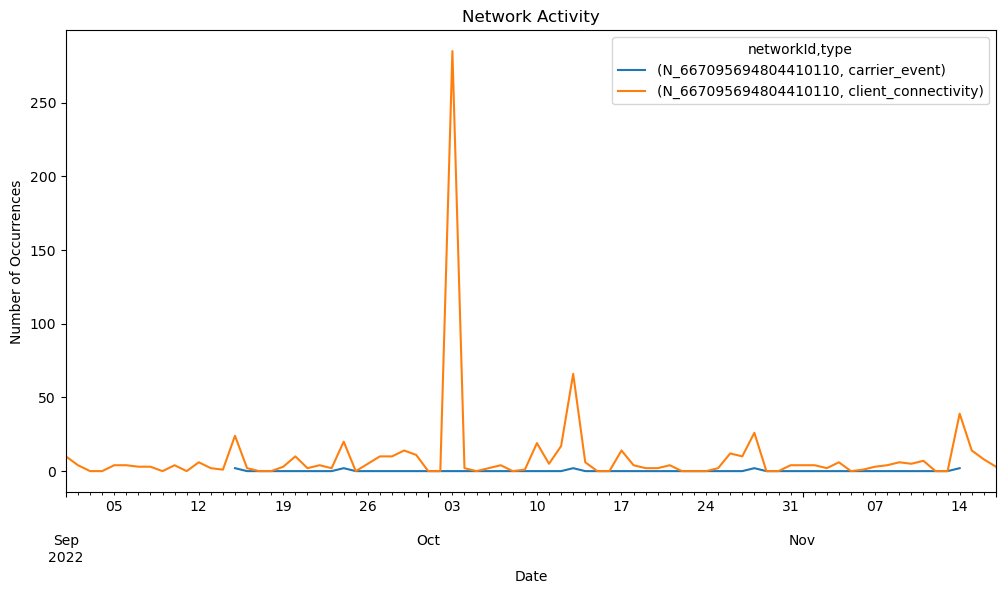

In [32]:
grouped.unstack(['networkId', 'type']).plot(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Network Activity')
plt.show()

In [69]:
security_data = pd.read_csv('network_events_202211181302.csv')
security_data.columns

C:\Users\Saiteja.Gummala\AppData\Local\Temp\ipykernel_3904\4039850502.py:1: DtypeWarning: Columns (7,8,10,12,14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  security_data = pd.read_csv('network_events_202211181302.csv')


Index(['networkId', 'type', 'description', 'clientId', 'clientDescription',
       'deviceSerial', 'deviceName', 'eventData_url', 'eventData_server',
       'eventData_categories', 'eventData_Source_IP', 'eventData_Source_Port',
       'eventData_Destination_IP', 'eventData_Destination_Port',
       'eventData_Protocol', 'eventData_NBAR_ID', 'eventData_Classification',
       'eventData_Layer_7_firewall_rule', 'occurredAt'],
      dtype='object')

In [70]:
security_data = security_data.loc[(security_data['type'] == 'dhcp_lease')]

In [71]:
security_data

,networkId,type,description,clientId,clientDescription,deviceSerial,deviceName,eventData_url,eventData_server,eventData_categories,eventData_Source_IP,eventData_Source_Port,eventData_Destination_IP,eventData_Destination_Port,eventData_Protocol,eventData_NBAR_ID,eventData_Classification,eventData_Layer_7_firewall_rule,occurredAt
18,N_667095694804410110,dhcp_lease,DHCP lease,k183447,Rakesh,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T20:55:44.517163Z
67,N_667095694804410110,dhcp_lease,DHCP lease,kfe74d8,Prudhvinadh Madasu,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T17:28:18.919406Z
225,N_667095694804410110,dhcp_lease,DHCP lease,k79439c,Android-3,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T16:22:36.014142Z
238,N_667095694804410110,dhcp_lease,DHCP lease,k476043,DESKTOP-KMSHJLH,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T16:16:51.088572Z
366,N_667095694804410110,dhcp_lease,DHCP lease,k3dc15e,Jyothi Swaroop,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T15:16:13.168345Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436706,N_667095694804410110,dhcp_lease,DHCP lease,k12fdce,00:0b:82:93:79:f2,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:46:56.123250Z
436707,N_667095694804410110,dhcp_lease,DHCP lease,kd5ef5b,DESKTOP-ED246FI,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:45:54.194392Z
436708,N_667095694804410110,dhcp_lease,DHCP lease,k0d88d3,DESKTOP-JMJVBSU,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:45:16.020082Z
436710,N_667095694804410110,dhcp_lease,DHCP lease,ked84b7,OPPO-F19,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:44:32.254329Z


In [72]:
features = ['networkId','type','occurredAt']
df = security_data[features]

In [73]:
df

,networkId,type,occurredAt
18,N_667095694804410110,dhcp_lease,2022-09-01T20:55:44.517163Z
67,N_667095694804410110,dhcp_lease,2022-09-01T17:28:18.919406Z
225,N_667095694804410110,dhcp_lease,2022-09-01T16:22:36.014142Z
238,N_667095694804410110,dhcp_lease,2022-09-01T16:16:51.088572Z
366,N_667095694804410110,dhcp_lease,2022-09-01T15:16:13.168345Z
...,...,...,...
436706,N_667095694804410110,dhcp_lease,2022-11-17T13:46:56.123250Z
436707,N_667095694804410110,dhcp_lease,2022-11-17T13:45:54.194392Z
436708,N_667095694804410110,dhcp_lease,2022-11-17T13:45:16.020082Z
436710,N_667095694804410110,dhcp_lease,2022-11-17T13:44:32.254329Z


In [74]:
df['occurredAt'] = pd.to_datetime(df['occurredAt'])

C:\Users\Saiteja.Gummala\AppData\Local\Temp\ipykernel_3904\3030579275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occurredAt'] = pd.to_datetime(df['occurredAt'])


In [75]:
df['occurredAt'] = df['occurredAt'].dt.strftime('%Y-%m-%d %H:%M:%S')

C:\Users\Saiteja.Gummala\AppData\Local\Temp\ipykernel_3904\4169183813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occurredAt'] = df['occurredAt'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [76]:
df

,networkId,type,occurredAt
18,N_667095694804410110,dhcp_lease,2022-09-01 20:55:44
67,N_667095694804410110,dhcp_lease,2022-09-01 17:28:18
225,N_667095694804410110,dhcp_lease,2022-09-01 16:22:36
238,N_667095694804410110,dhcp_lease,2022-09-01 16:16:51
366,N_667095694804410110,dhcp_lease,2022-09-01 15:16:13
...,...,...,...
436706,N_667095694804410110,dhcp_lease,2022-11-17 13:46:56
436707,N_667095694804410110,dhcp_lease,2022-11-17 13:45:54
436708,N_667095694804410110,dhcp_lease,2022-11-17 13:45:16
436710,N_667095694804410110,dhcp_lease,2022-11-17 13:44:32


In [77]:
df['occurredAt'] = pd.to_datetime(df['occurredAt'])

C:\Users\Saiteja.Gummala\AppData\Local\Temp\ipykernel_3904\3030579275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occurredAt'] = pd.to_datetime(df['occurredAt'])


In [78]:
df.set_index('occurredAt', inplace=True)

In [79]:
grouped = df.groupby(['networkId', 'type'])['type'].resample('D').count()

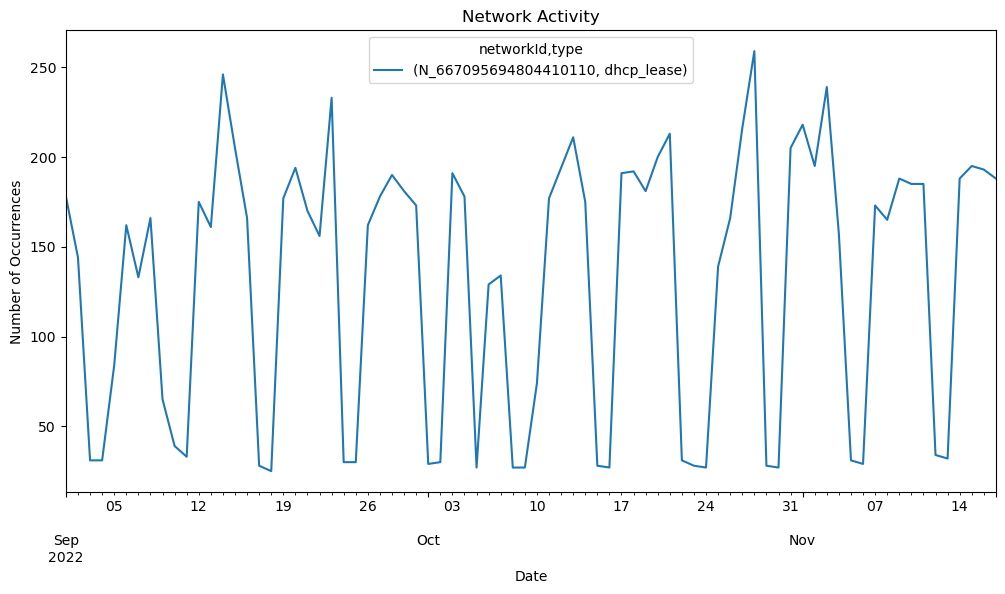

In [80]:
grouped.unstack(['networkId', 'type']).plot(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Network Activity')
plt.show()